### Introduction


### Setup and Initialize the Notebook
Import Python libraries and frameworks, and initialize the notebook.

In [53]:
# MANDATORY! Import dependencies and setup notebook
%run ./common/widgets_utility

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import os
import glob
import math
import types
import logging
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import display, HTML, clear_output, IFrame
from itertools import product

logger = logging.getLogger('explore-topic-models')

%config IPCompleter.greedy=True
%autosave 120

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('precision', 10)

if 'extend' not in globals():
    extend = lambda a,b: a.update(b) or a
    
class WordcloudUtility:
    
    def plot_wordcloud(df_data, token='token', weight='weight', **args):
        token_weights = dict({ tuple(x) for x in df_data[[token, weight]].values })
        image = wordcloud.WordCloud(**args,)
        image.fit_words(token_weights)
        plt.figure(figsize=(12, 12)) #, dpi=100)
        plt.imshow(image, interpolation='bilinear')
        plt.axis("off")
        # plt.set_facecolor('w')
        # plt.tight_layout()
        plt.show()

%run google_drive

Autosaving every 120 seconds


### Generate Topic Wordclouds

In [56]:
file_id = '1bB4xyTIs_9OZH6fo5IeWnsPaMX3P73WV'
filename = 'wordcloud.xlsx'
download = True
def read_excel(filename):
    with pd.ExcelFile(filename) as xls:
        return pd.read_excel(xls, None)

if download:
    download_file_from_google_drive(file_id, filename)
    
data = read_excel(filename)
data = dict(data)
#print(data)

INFO:root:Stored: wordcloud.xlsx


Stored: wordcloud.xlsx


In [68]:

opts = { 'max_font_size': 50, 'background_color': 'white', 'width': 300, 'height': 300 }
    
def plot_wordcloud(df_data, token='token', weight='weight', figsize=(12, 12), **args):
    token_weights = dict({ tuple(x) for x in df_data[[token, weight]].values })
    image = wordcloud.WordCloud(**args,)
    image.fit_words(token_weights)
    plt.figure(figsize=(6,6)) #, dpi=100)
    plt.imshow(image, interpolation='bilinear')
    plt.axis("off")
    # plt.set_facecolor('w')
    # plt.tight_layout()
    plt.show()
        
@widgets.interact(data_id=data.keys())
def plot_cloud(data_id):
    
    competences = data[data_id]

    plot_wordcloud(competences, 'token', 'weight', max_words=999, figsize=(6,6), **opts)



interactive(children=(Dropdown(description='data_id', options=('frameworks', 'pitfalls', 'competences', 'tools & infrastructure', 'method'), value='frameworks'), Output()), _dom_classes=('widget-interact',))

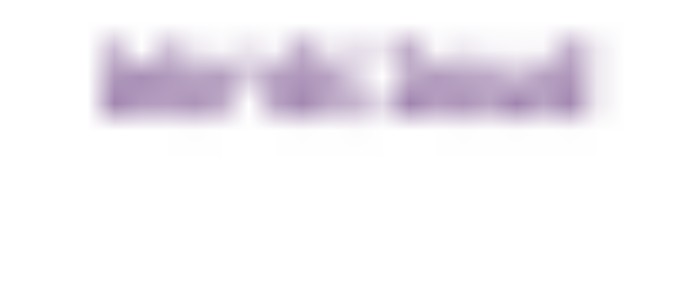

In [60]:
opts = { 'max_font_size': 18, 'background_color': 'white', 'width': 25, 'height': 10 }
    
df = pd.DataFrame(data={ 'token': ['Wordcloud'], 'weight': [1]})

WordcloudUtility.plot_wordcloud(df, 'token', 'weight', max_words=999, **opts)
    